In [1]:
# FASHION MNIST Label Description

# 0 T-shirt/top

# 1 Trouser

# 2 Pullover

# 3 Dress

# 4 Coat

# 5 Sandal

# 6 Shirt

# 7 Sneaker

# 8 Bag

# 9 Ankle boot

In [ ]:
# Importing the packages/Dependencies
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [ ]:
#Loading the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

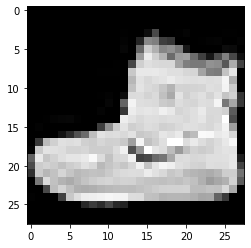

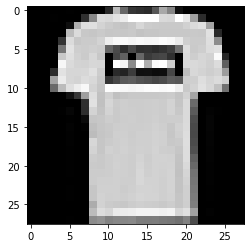

In [ ]:
#Visualize the images
for i in range(2):
  plt.imshow(X_train[i],cmap = 'gray')
  plt.show()

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Normalizing our datatset images from 0-255 pixel values to 0-1
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Encoding the lables using np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Reshaping our (28, 28) image to (28,28,1) where 1 represents the channel or the depth
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)


In [ ]:
# Building our Convolutional neural network
model = Sequential()


In [ ]:
#building a convolution layer by giving the input no.of kernels and kernel size and the input shape
model.add(Conv2D(32,(3,3), activation = 'relu',input_shape = (28,28,1)))

# Adding the maxpooling layer to extract the features as well as to reduce the size of the image
model.add(MaxPooling2D(2,2))
#flatten will reshape our n dim array to 1d vector. The input require for the fully connected neural network
model.add(Flatten())
#fully connected layer
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
#output layer
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 174,794
Trainable params: 174,794
Non-trainable params: 0
________________________________________________

In [ ]:
#What cost and optimization to use
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [ ]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 10)

Epoch 1/10
300/300 [==============================] - 21s 68ms/step - loss: 0.9523 - accuracy: 0.6660
Epoch 2/10
300/300 [==============================] - 20s 67ms/step - loss: 0.3993 - accuracy: 0.8604
Epoch 3/10
300/300 [==============================] - 21s 69ms/step - loss: 0.3399 - accuracy: 0.8808
Epoch 4/10
300/300 [==============================] - 20s 67ms/step - loss: 0.3090 - accuracy: 0.8909
Epoch 5/10
300/300 [==============================] - 20s 67ms/step - loss: 0.2838 - accuracy: 0.8984
Epoch 6/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2689 - accuracy: 0.9028
Epoch 7/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2557 - accuracy: 0.9089
Epoch 8/10
300/300 [==============================] - 20s 68ms/step - loss: 0.2378 - accuracy: 0.9157
Epoch 9/10
300/300 [==============================] - 20s 67ms/step - loss: 0.2299 - accuracy: 0.9177
Epoch 10/10
300/300 [==============================] - 20s 68ms/step - loss: 0.214

In [ ]:
#evaluating our test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2690 - accuracy: 0.9021


[0.2690393924713135, 0.9021000266075134]

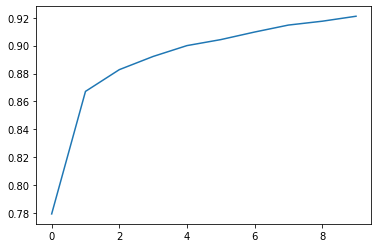

In [ ]:
#plotting our accuracy
plt.plot(history.history['accuracy'])

In [ ]:
#Predicting the model
prediction = model.predict(X_test)

In [ ]:
#rounding our output to the exact number
print(np.argmax(np.round(prediction[10])))

4


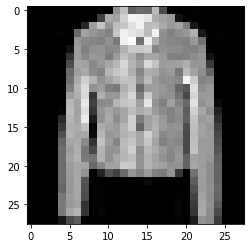

In [ ]:
#plotting our test for verification
plt.imshow(X_test[10].reshape(28,28),cmap = 'gray')
plt.show()